# MCMC Toys

We try random walk Metropolis algorithm for two toy cases.

1. Target density is $p(x) = N(x |0,1)$
   1. Proposal is $N(0,s)$
   
2. Target is $p(x) = .5  N(x|-2,1) + .5 N(x|2,1)$
   1. Proposal is $N(0,s)$

In [2]:
import scipy.stats as stats 
from scipy.special import beta # beta function
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

In [212]:
# the posterior which we want to get samples from.
class Posterior():
    def __init__(self, mean=0):
        self.mean = mean
        pass 
    
    def pdf(self, x):
        pdf = 0
        pdf += stats.multivariate_normal(self.mean).pdf(x) 
        return   pdf 

    def rvs(self, N=1):
            return stats.multivariate_normal(self.mean).rvs(size=N)  # 2D Gaussian(0, I)

    def plot_trace1d(self, trace=None, option=None, alpha=0.5, bins=30):
        plt.figure(figsize=(7,7))
        if trace is not None:
            trace = np.array(trace)     
            plt.hist(trace, bins=bins, alpha=alpha, density=True)
        #
        x = np.linspace(-4, 4, 100)
        pdf = Prob.pdf(x) # stats.multivariate_normal((0,0)).pdf(gridpoints)

        plt.plot(x, pdf)
 
    #
            
    def plot_trace(self, trace=None, option=None, alpha=0.5):

        xa = np.linspace(-4, 4, 100)
        ya = np.linspace(-4, 4, 100)
        mesh = np.meshgrid(xa, ya)
        x1, x2  = mesh[0], mesh[1]
        gridpoints = np.vstack([np.ravel(x1), x2.ravel()]).T
        normal2d = Prob.pdf(gridpoints) # stats.multivariate_normal((0,0)).pdf(gridpoints)

        plt.figure(figsize=(7,7))
        plt.contour(x1, x2, normal2d.reshape(100,100), levels=20)
        plt.gca().set_aspect("equal");

        if trace is not None:
            trace = np.array(trace)     
            if option is None:
                option = '-o'
            plt.plot(trace[:,0], trace[:,1], option, alpha=alpha)        
#

In [213]:
Prob = Posterior(mean=0)

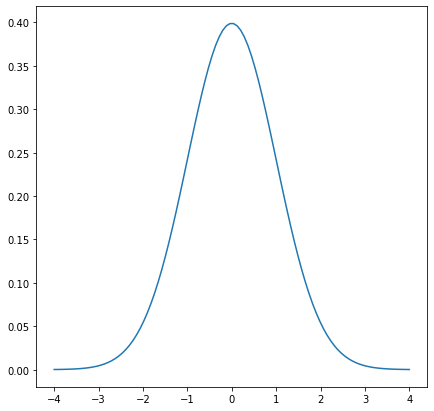

In [214]:
Prob.plot_trace1d()

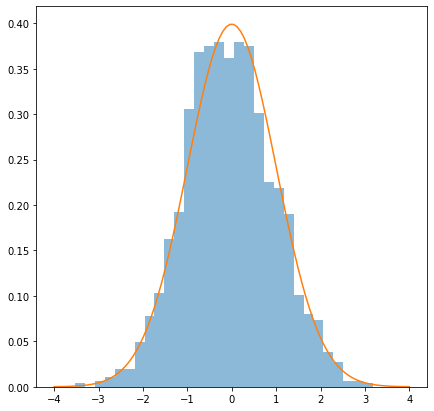

In [215]:
rvs = Prob.rvs(2000)
Prob.plot_trace1d(rvs, option='o', alpha=.51)

In [222]:
def proposal(x):
    cov = 0.31
    return stats.multivariate_normal.rvs(mean=x, cov=cov)

In [223]:
th = np.array(0)
trace = [th]
for _ in range(5):
    th = proposal(th)
    trace.append(th)
trace = np.array(trace)     
trace[0]

0.0

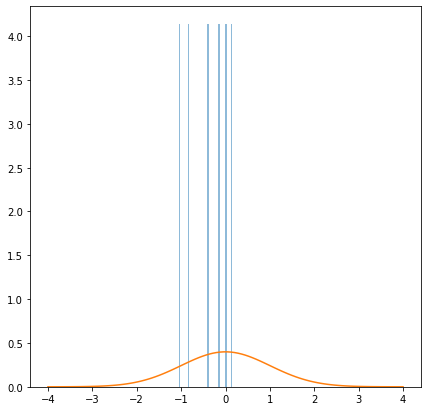

In [224]:
Prob.plot_trace1d(trace)

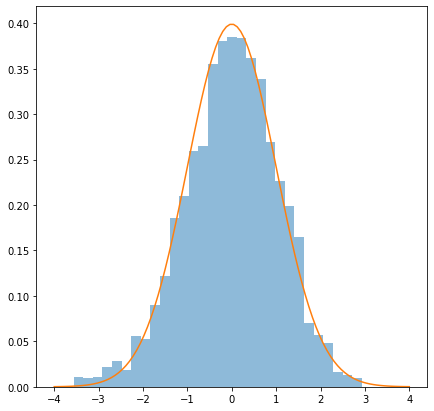

In [226]:
# MCMC sampling by Random Walk Metropolis Algorithm
N = 5000
th = -3.  # starting location
Pth = Prob.pdf(th)
trace = [th]
for _ in range(N):
    th_next = proposal(th)
    Pnext = Prob.pdf(th_next)
    r =  Pnext / Pth 
    if r >= 1:
        th, Pth = th_next, Pnext
    else:
        p = stats.uniform(0,1).rvs()
        if p < r:
            th, Pth = th_next, Pnext
    #
    trace.append(th)
#
trace = np.array(trace)
Prob.plot_trace1d(trace, alpha=.5)

## More Complex Posterior

In [243]:
# the posterior which we want to get samples from.
class Posterior():
    def __init__(self,):
        self.means = [-2, 2]
        self.mixp  = [.5, .5]
        pass 
    
    def pdf(self, x):
        pdf = 0
        for m, p in zip(self.means, self.mixp):
            pdf += stats.multivariate_normal(m).pdf(x) * p 
        return   pdf 

    def rvs(self, N=1):
        rs = []
        for k in range(N):
            p = stats.uniform(0,1).rvs()
            if p < .5:
                r = stats.multivariate_normal(self.means[0]).rvs(size=1)
            else:
                r = stats.multivariate_normal(self.means[1]).rvs(size=1)
            rs.append(r)
        if N == 1: 
            return rs[0]
        else:
            return np.array(rs)
    #
    
    def plot_trace1d(self, trace=None, option=None, alpha=0.5, bins=30):
        plt.figure(figsize=(7, 5))
        if trace is not None:
            trace = np.array(trace)     
            plt.hist(trace, bins=bins, alpha=alpha, density=True)
        #
        x = np.linspace(-6, 6, 100)
        pdf = Prob.pdf(x)

        plt.plot(x, pdf)
        return 
    #
#

In [244]:
Prob = Posterior()

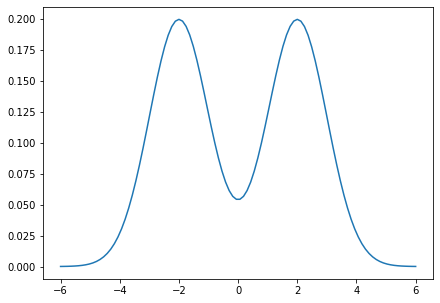

In [245]:
Prob.plot_trace1d()

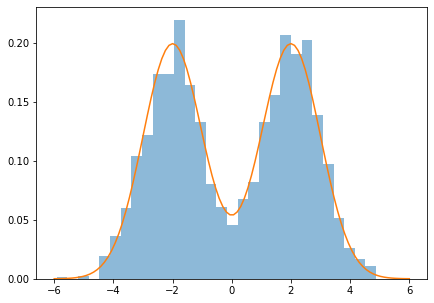

In [246]:
rvs = Prob.rvs(2000)
Prob.plot_trace1d(rvs, option='o', alpha=.51)

In [247]:
def proposal(x):
    cov = 0.31
    return stats.multivariate_normal.rvs(mean=x, cov=cov)

In [248]:
th = np.array(0)
trace = [th]
for _ in range(5):
    th = proposal(th)
    trace.append(th)
trace = np.array(trace)     
trace[0]

0.0

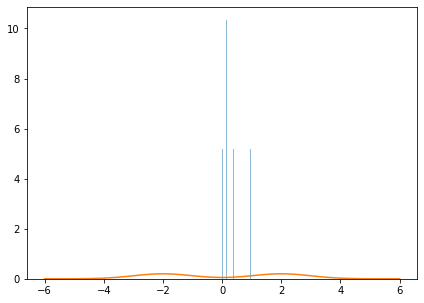

In [249]:
Prob.plot_trace1d(trace)

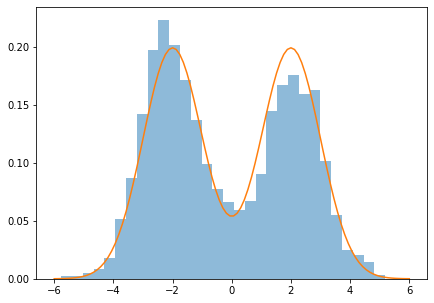

In [251]:
# MCMC sampling by Random Walk Metropolis Algorithm
N = 5000
th = -3.  # starting location
Pth = Prob.pdf(th)
trace = [th]
for _ in range(N):
    th_next = proposal(th)
    Pnext = Prob.pdf(th_next)
    r =  Pnext / Pth 
    if r >= 1:
        th, Pth = th_next, Pnext
    else:
        p = stats.uniform(0,1).rvs()
        if p < r:
            th, Pth = th_next, Pnext
    #
    trace.append(th)
#
trace = np.array(trace)
Prob.plot_trace1d(trace, alpha=.5)

End.